In [ ]:
!pip install opendartreader
!pip install finance-datareader
!pip install pykrx
!pip install dataframe-image

     |████████████████████████████████| 1.3MB 10.9MB/s 
     |████████████████████████████████| 143kB 42.5MB/s 
     |████████████████████████████████| 296kB 47.9MB/s 


In [ ]:
import OpenDartReader as reader
import FinanceDataReader as fdr
from pykrx import stock
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import dataframe_image as dfi

In [ ]:
KS = stock.get_market_ticker_list(market="KOSPI") # 코스피 전 종목 리스트

In [ ]:
stock_list = [] # PER이 15이하, PBR이 1.5 이하인 종목들을 서치하여 넣을 리스트 정의
score_list = [] # 저 PER, PBR 종목 점수를 넣을 리스트 정의

sleep = 0 

for i in KS:
  
  try: # 19년도 1월 PER, PBR을 기준으로 서치

    PER = stock.get_market_fundamental_by_date("20190101","20191231",i,"m").iloc[0,:].PER
    PBR = stock.get_market_fundamental_by_date("20190101","20190231",i,"m").iloc[0,:].PBR
    score = PER*2+PBR # PER에 가중치를 2로 두고 스코어 환산

  except:
    print(i) # 19년도에 상장이 되지 않은 종목들은 서치가 안되기 때문에 오류 발생, 예외처리

  sleep+=1 

  if (PER < 15) & (PBR < 1.5): # PER 15 미만, PBR 1.5 미만이면 종목 티커를 stock_list에 넣음
    stock_list.append(i)
    score_list.append(score)
  
  if sleep%100==0:
    print("------------Sleep time------------ : {}".format(sleep))
    time.sleep(30) # 분당 1000회 이상 크롤링을 할 시 IP가 차단당하기 때문에 sleep 변수가 100이 되면 30초 동안 서치 중지

001040
00104K
375500
37550K
365550
383220
383800
38380K
------------Sleep time------------ : 100
338100
302440
326030
361610
339770
------------Sleep time------------ : 200
353200
35320K
------------Sleep time------------ : 300
336260
33626K
33626L
192650
330590
088980
094800
009900
204210
357250
155900
096300
------------Sleep time------------ : 400
308170
336370
33637K
33637L
248070
------------Sleep time------------ : 500
293940
00279K
140910
244920
380440
900140
------------Sleep time------------ : 600
088260
350520
334890
317400
348950
013890
344820
------------Sleep time------------ : 700
145270
357120
363280
36328K
950210
172580
153360
352820
152550
------------Sleep time------------ : 800
168490
272210
322000
307950
------------Sleep time------------ : 900
378850


In [ ]:
df_stock = pd.DataFrame({
    "Tiker" : list(map(str,stock_list)),
    "Score" : score_list
}) # 서치된 티커와 스코어를 데이터프레임화

In [ ]:
df_stock = df_stock[df_stock.Score > 10] # 적자가 나거나 아예 0인 기업이 있어서 임의 기준 10 이상 종목들만 남김
df_stock = df_stock.sort_values(by="Score") # 오름차순 정렬

In [ ]:
df_stock.reset_index(inplace=True,drop=True)

In [ ]:
df_stock

,Tiker,Score
0,001500,10.11
1,001430,10.20
2,010780,10.24
3,002030,10.33
4,042660,10.37
...,...,...
271,026960,30.06
272,015890,30.10
273,008870,30.57
274,020000,30.59


In [ ]:
df_stock.to_csv("/content/drive/MyDrive/df_stock.csv",index=False) # csv 파일로 저장

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/df_stock.csv")

In [ ]:
top10 = df.Tiker[:10].tolist() # 상위 10개 종목만 불러오기

In [ ]:
stock_dict = {}

for i in top10:

  stock_dict[i] = fdr.DataReader(i,"2019")["Close"].values # 상위 10개 종목들 2019년도 부터 종가 데이터 

In [ ]:
stock_dict_rtn = {} # 각 종목별 수익률을 저장하기 위해 딕셔너리 정의

for i in top10:

  buy = stock_dict[i][0] # BUY & HOLD 전략을 구사할 것이기 때문에 2019년 최초 가격을 매수가로 설정
  stock_dict_rtn[i] = [] # 수익률을 저장할 리스트 정의

  for j in range(1,len(stock_dict[i])):

    rtn = (stock_dict[i][j] - buy)/buy # 수익률 계산
    
    stock_dict_rtn[i].append(rtn)

In [ ]:
portfolio_rtn = []
df_rtn1 = pd.DataFrame(stock_dict_rtn) # 수익률 딕셔너리 데이터프레임화
df_rtn2 = pd.DataFrame(stock_dict_rtn)*0.1 # 총 10가지 종목, 각 종목이 전체 포트폴리오의 10%를 차지

In [ ]:
df_rtn1

,001500,001430,010780,002030,042660,103140,000400,002170,003960,008420
0,-0.003571,-0.062678,-0.040268,-0.021834,0.006006,-0.003766,0.009416,-0.002375,0.012448,0.029982
1,-0.001190,-0.085470,-0.046980,-0.021834,0.000000,-0.005650,0.011299,-0.002375,0.018672,0.022928
2,0.022619,-0.079772,-0.036913,-0.013100,-0.015015,0.045198,0.015066,-0.002375,0.020747,0.275132
3,0.016667,-0.091168,-0.041946,-0.008734,-0.057057,0.041431,0.016949,0.008314,-0.029046,0.303351
4,0.029762,-0.054131,-0.023490,0.000000,-0.057057,0.099812,0.015066,-0.002375,0.002075,0.319224
...,...,...,...,...,...,...,...,...,...,...
614,0.654762,0.823362,0.996644,0.135371,0.081081,0.433145,-0.239171,0.864608,0.120332,0.883598
615,0.654762,0.806268,1.040268,0.135371,0.075075,0.436911,-0.239171,0.862233,0.149378,0.869489
616,0.619048,0.803419,1.050336,0.139738,0.051051,0.431262,-0.241055,0.843230,0.161826,0.858907
617,0.619048,0.794872,1.070470,0.135371,0.082583,0.433145,-0.239171,0.840855,0.143154,0.880071


In [ ]:
df_rtn2["portfolio_rtn"] = df_rtn2.sum(axis=1) 

In [ ]:
df_rtn2

,001500,001430,010780,002030,042660,103140,000400,002170,003960,008420,portfolio_rtn
0,-0.000357,-0.006268,-0.004027,-0.002183,0.000601,-0.000377,0.000942,-0.000238,0.001245,0.002998,-0.007664
1,-0.000119,-0.008547,-0.004698,-0.002183,0.000000,-0.000565,0.001130,-0.000238,0.001867,0.002293,-0.011060
2,0.002262,-0.007977,-0.003691,-0.001310,-0.001502,0.004520,0.001507,-0.000238,0.002075,0.027513,0.023159
3,0.001667,-0.009117,-0.004195,-0.000873,-0.005706,0.004143,0.001695,0.000831,-0.002905,0.030335,0.015876
4,0.002976,-0.005413,-0.002349,0.000000,-0.005706,0.009981,0.001507,-0.000238,0.000207,0.031922,0.032888
...,...,...,...,...,...,...,...,...,...,...,...
614,0.065476,0.082336,0.099664,0.013537,0.008108,0.043315,-0.023917,0.086461,0.012033,0.088360,0.475373
615,0.065476,0.080627,0.104027,0.013537,0.007508,0.043691,-0.023917,0.086223,0.014938,0.086949,0.479058
616,0.061905,0.080342,0.105034,0.013974,0.005105,0.043126,-0.024105,0.084323,0.016183,0.085891,0.471776
617,0.061905,0.079487,0.107047,0.013537,0.008258,0.043315,-0.023917,0.084086,0.014315,0.088007,0.476040


In [ ]:
KS = fdr.DataReader("KS11","2019","2020")["Close"].values.tolist() # 2019~ 코스티 종가 데이터
KS_rtn = []
buy = KS[0]

for i in range(1,len(KS)):
  
  rtn = (KS[i] - buy)/buy # 개별 종목 수익률 계산과 마찬가지로 코스피도 2019년 최초가로 매수 후 BUY & HOLD 하였다고 가정
  KS_rtn.append(rtn)

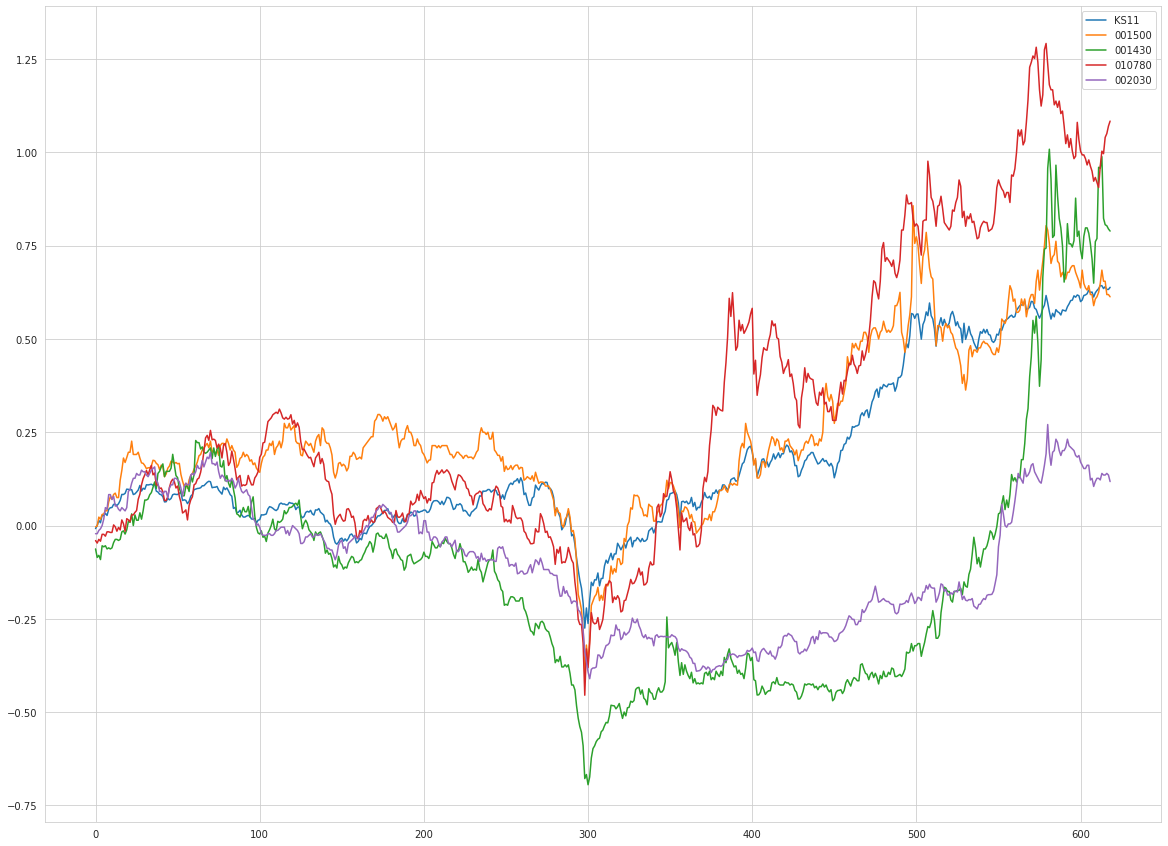

In [ ]:
ticker = df_rtn1.columns.tolist()

sns.set_style("whitegrid")

plt.figure(figsize=(20,15))
plt.plot(KS_rtn,label="KS11")

for i in range(0,4):

  plt.plot(df_rtn1[ticker[i]],label=ticker[i])

plt.legend()

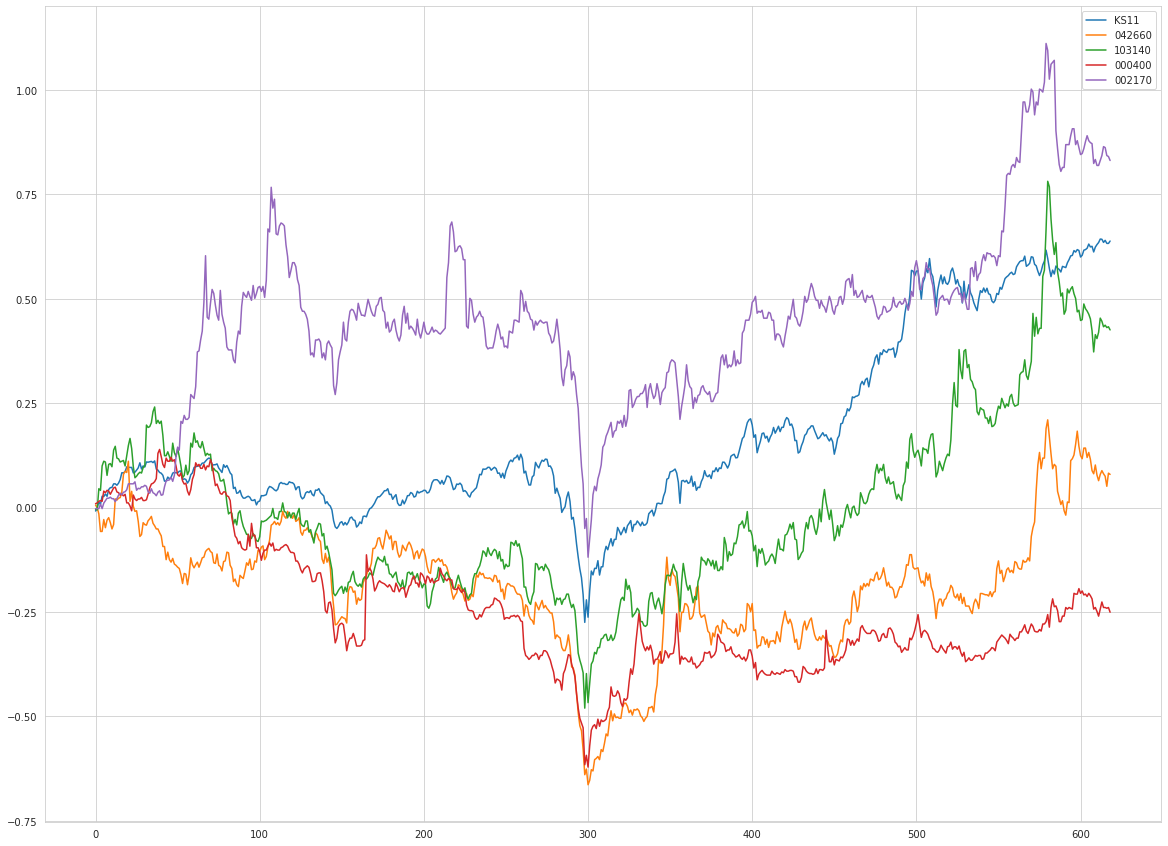

In [ ]:
ticker = df_rtn1.columns.tolist()

sns.set_style("whitegrid")

plt.figure(figsize=(20,15))
plt.plot(KS_rtn,label="KS11")

for i in range(4,8):

  plt.plot(df_rtn1[ticker[i]],label=ticker[i])

plt.legend()

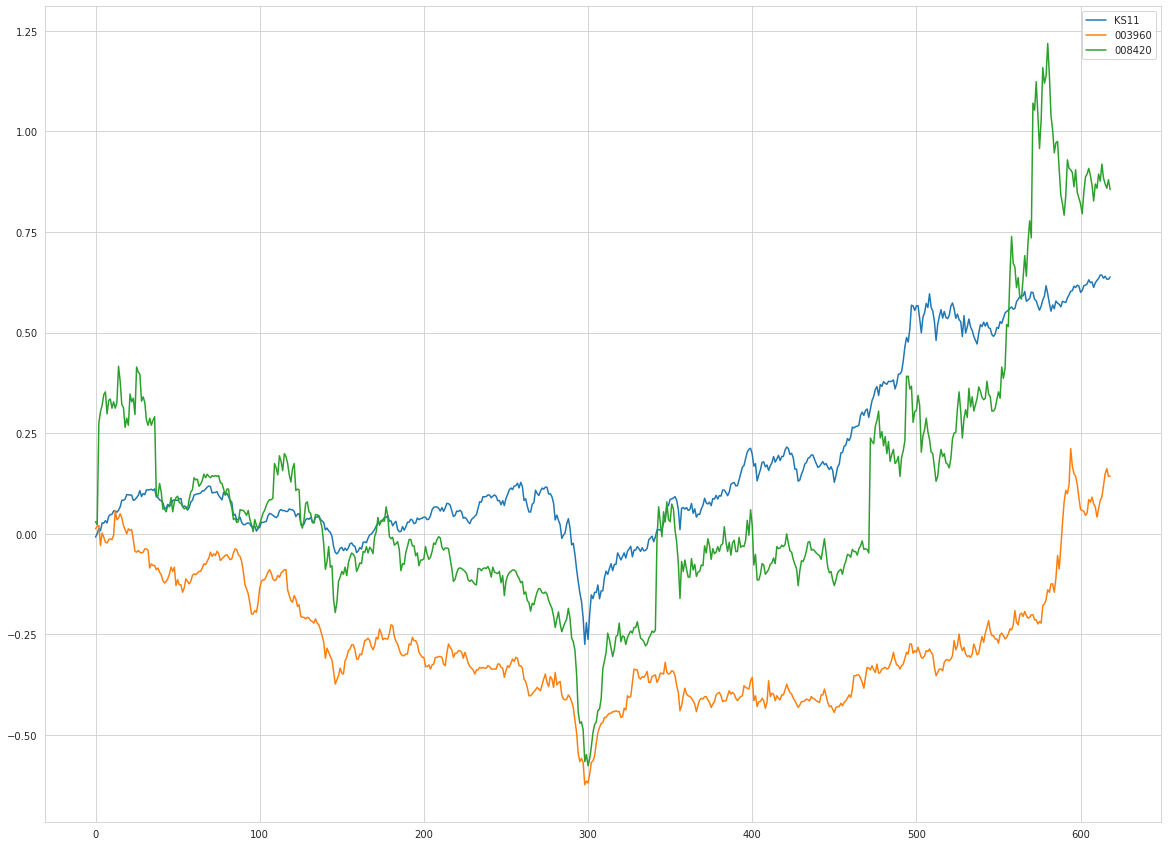

In [ ]:
ticker = df_rtn1.columns.tolist()

sns.set_style("whitegrid")

plt.figure(figsize=(20,15))
plt.plot(KS_rtn,label="KS11")

for i in range(8,10):

  plt.plot(df_rtn1[ticker[i]],label=ticker[i])

plt.legend()

In [ ]:
df

,Tiker,Score
0,001500,10.11
1,001430,10.20
2,010780,10.24
3,002030,10.33
4,042660,10.37
...,...,...
271,026960,30.06
272,015890,30.10
273,008870,30.57
274,020000,30.59


In [ ]:
ticker = df.Tiker.to_list()
ticker_len = len(ticker)
process_len = 1

market_cap = [] # 시가총액 정보를 담기위한 리스트 정의



for i in ticker:

  try:
    market_cap.append(stock.get_market_cap_by_date(fromdate="20190101",todate="20190131",ticker=i)["시가총액"][0]) # 2019년 1월달 시가총액 데이터 저장
  except:
    market_cap.append(np.NaN) # 시가총액 데이터 없을 시 예외처리, NaN 값으로 저장

  process_len += 1

  if process_len%20==0:

    print("####### 진행률 : {}%".format(round(process_len/ticker_len*100)))

####### 진행률 : 7%
####### 진행률 : 14%
####### 진행률 : 22%
####### 진행률 : 29%
####### 진행률 : 36%
####### 진행률 : 43%
####### 진행률 : 51%
####### 진행률 : 58%
####### 진행률 : 65%
####### 진행률 : 72%
####### 진행률 : 80%
####### 진행률 : 87%
####### 진행률 : 94%


In [ ]:
market_cap = pd.DataFrame(market_cap,columns=["market_cap"])

In [ ]:
market_cap

,market_cap
0,2.464317e+11
1,6.293802e+11
2,9.194305e+11
3,2.508722e+11
4,3.569952e+12
...,...
271,1.759705e+12
272,1.601736e+11
273,6.490000e+10
274,8.940690e+11


In [ ]:
df = df.join(market_cap)

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.sort_values(by="market_cap",ascending=False,inplace=True,ignore_index=True)

In [ ]:
df

,Tiker,Score,market_cap
0,005930,14.30,2.313291e+14
1,005380,15.67,2.435817e+13
2,017670,16.13,2.200321e+13
3,005490,14.23,2.066328e+13
4,105560,11.62,1.921223e+13
...,...,...,...
264,005820,19.26,3.916000e+10
265,006200,16.52,3.828497e+10
266,009180,17.89,3.530849e+10
267,003680,23.14,3.417910e+10


In [ ]:
top10_2 = df.Tiker[:10].to_list()

stock_dict2 = {}

for i in top10_2:

  stock_dict2[i] = fdr.DataReader(i,"2019","2020")["Close"].values # 상위 10개 종목들 2019년도~2020년 까지 종가 데이터 

In [ ]:
stock_dict_rtn2 = {} # 각 종목별 수익률을 저장하기 위해 딕셔너리 정의

for i in top10_2:

  buy = stock_dict2[i][0] # BUY & HOLD 전략을 구사할 것이기 때문에 2019년 최초 가격을 매수가로 설정
  stock_dict_rtn2[i] = [] # 수익률을 저장할 리스트 정의

  for j in range(1,len(stock_dict2[i])):

    rtn = (stock_dict2[i][j] - buy)/buy # 수익률 계산
    
    stock_dict_rtn2[i].append(rtn)

In [ ]:
portfolio_rtn2 = []
df_rtn1_by_cap = pd.DataFrame(stock_dict_rtn2) # 수익률 딕셔너리 데이터프레임화
df_rtn2_by_cap = pd.DataFrame(stock_dict_rtn2)*0.1 # 총 10가지 종목, 각 종목이 전체 포트폴리오의 10%를 차지
df_rtn2_by_cap["Portfolio_rtn"] = df_rtn2_by_cap.sum(axis=1)

In [ ]:
df_rtn2_by_cap

,005930,005380,017670,005490,105560,055550,012330,034730,032830,096770,Portfolio_rtn
0,-0.002968,0.002193,0.001101,0.000000,0.001088,-0.000761,0.003784,-0.002579,0.000374,-0.001479,0.000752
1,-0.003355,0.004825,0.002569,0.000844,-0.000653,-0.001015,0.007838,-0.001587,0.001494,0.000000,0.010959
2,0.000000,0.005702,0.001468,0.003797,-0.001088,-0.001650,0.007297,0.000000,0.001743,0.002959,0.020229
3,-0.001677,0.004825,0.001284,0.003586,-0.000979,-0.002284,0.004324,0.000794,0.001494,0.004734,0.016101
4,0.002194,0.007895,-0.001101,0.007806,0.001088,-0.000127,0.009459,0.001190,0.002366,0.006509,0.037279
...,...,...,...,...,...,...,...,...,...,...,...
240,0.043226,0.007456,-0.010459,0.002743,0.008596,0.016244,0.040541,0.003770,-0.005106,-0.009172,0.097839
241,0.041935,0.007018,-0.011009,0.001266,0.007617,0.015609,0.039189,0.003968,-0.004981,-0.008876,0.091736
242,0.042968,0.007456,-0.010275,0.002532,0.007508,0.016117,0.041081,0.004167,-0.004608,-0.008284,0.098661
243,0.045806,0.005702,-0.012844,0.000633,0.004570,0.011929,0.039189,0.004167,-0.007347,-0.010651,0.081154


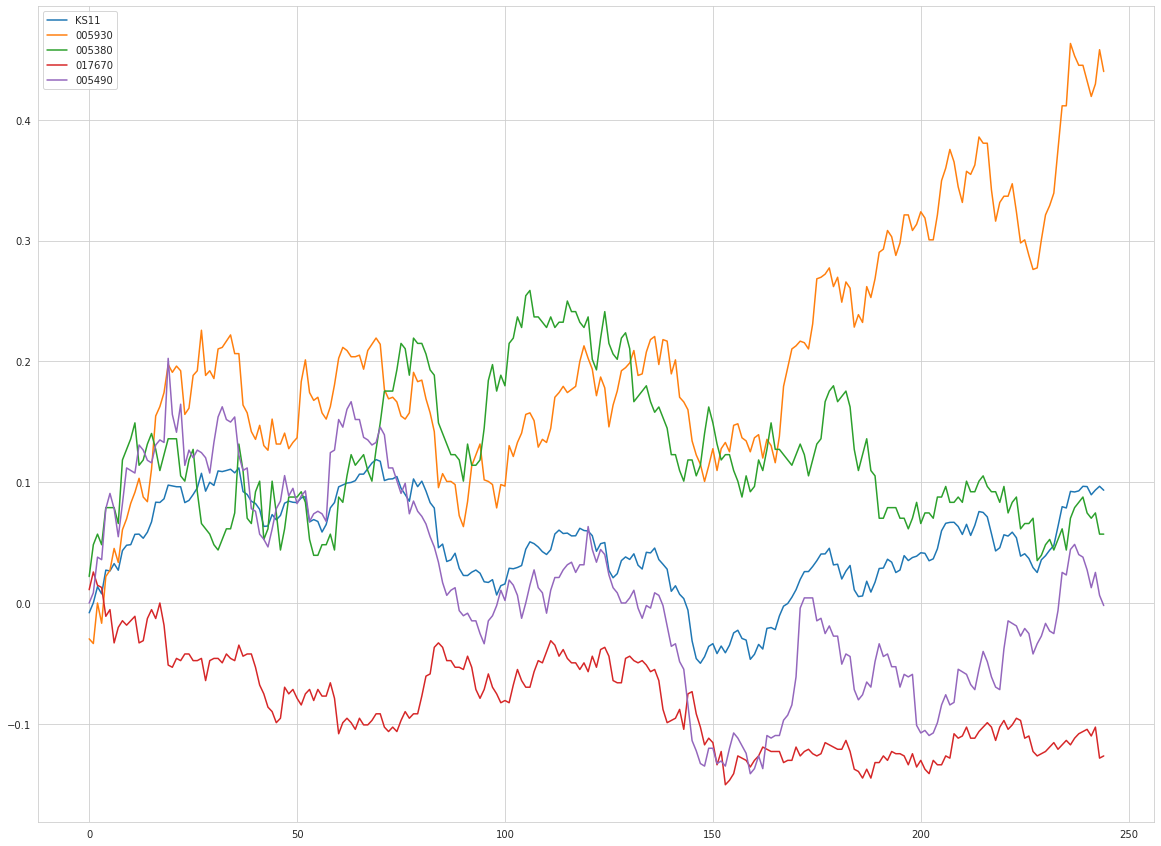

In [ ]:
ticker = df_rtn1_by_cap.columns.tolist()

sns.set_style("whitegrid")

plt.figure(figsize=(20,15))
plt.plot(KS_rtn,label="KS11")

for i in range(0,4):

  plt.plot(df_rtn1_by_cap[ticker[i]],label=ticker[i])

plt.legend()

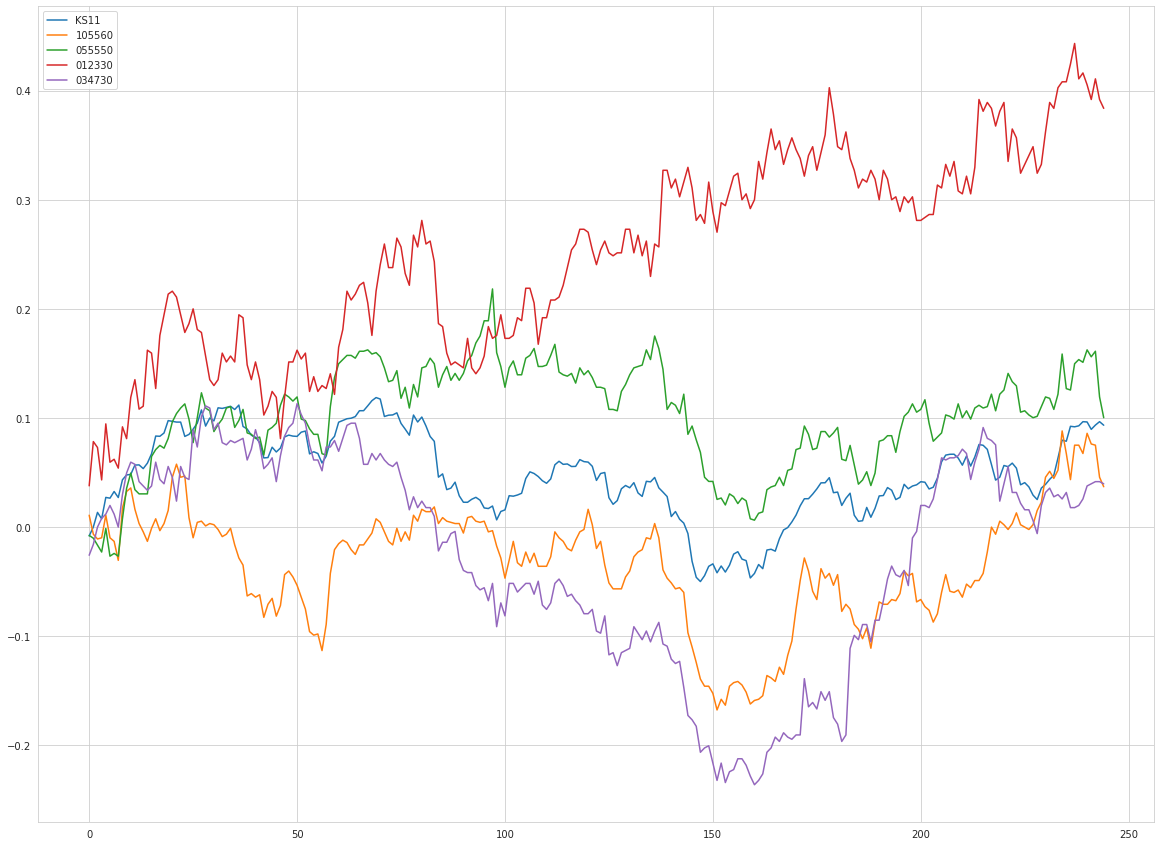

In [ ]:
ticker = df_rtn1_by_cap.columns.tolist()

sns.set_style("whitegrid")

plt.figure(figsize=(20,15))
plt.plot(KS_rtn,label="KS11")

for i in range(4,8):

  plt.plot(df_rtn1_by_cap[ticker[i]],label=ticker[i])

plt.legend()

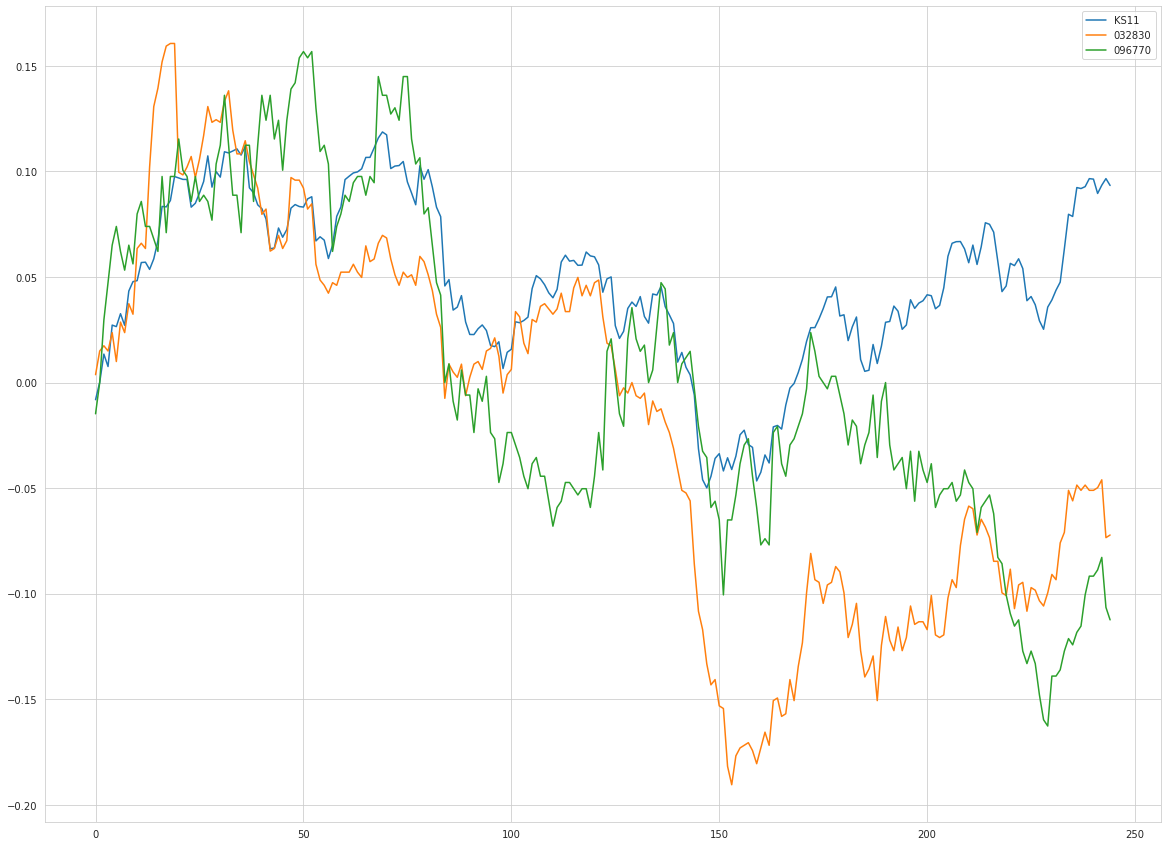

In [ ]:
ticker = df_rtn1_by_cap.columns.tolist()

sns.set_style("whitegrid")

plt.figure(figsize=(20,15))
plt.plot(KS_rtn,label="KS11")

for i in range(8,10):

  plt.plot(df_rtn1_by_cap[ticker[i]],label=ticker[i])

plt.legend()

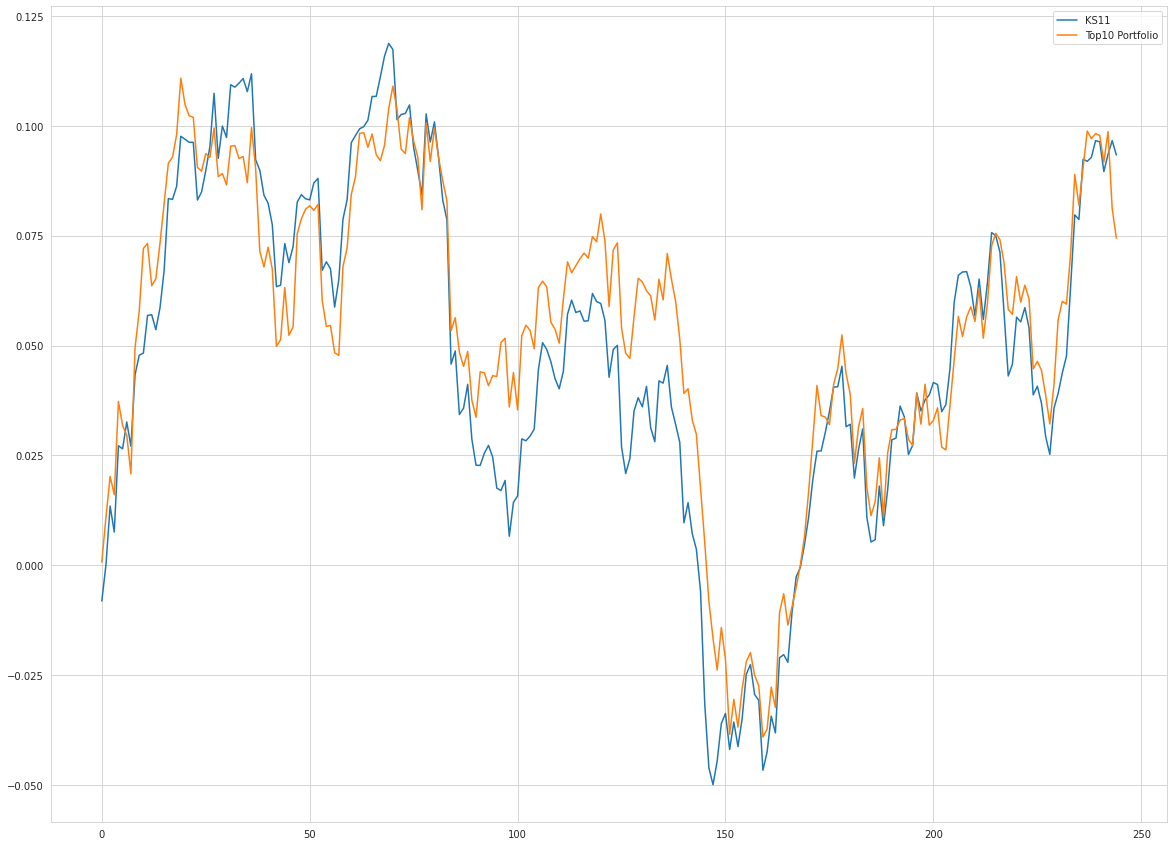

In [ ]:
ticker = df_rtn1_by_cap.columns.tolist()

sns.set_style("whitegrid")

plt.figure(figsize=(20,15))
plt.plot(KS_rtn,label="KS11")
plt.plot(df_rtn2_by_cap.Portfolio_rtn,label="Top10 Portfolio")
plt.legend()

In [ ]:
def geometric_rtn(rtn_list):
  
  result = 1
  total_len = len(rtn_list)

  for i in rtn_list:

    result *= (1+i)
  
  return (result**(1/total_len)-1)

In [ ]:
geometric_rtn(KS_rtn)

0.04723833163029023

In [ ]:
geometric_rtn(df_rtn2_by_cap.Portfolio_rtn.to_list())

0.052928042817538934

In [ ]:
KS_rtn_list = np.array(KS_rtn)
portfolio_rtn_list = np.array(df_rtn2_by_cap.Portfolio_rtn.to_list())

np.mean((portfolio_rtn_list - KS_rtn_list)/KS_rtn_list)

0.5595167799541297